In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree     import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics         import accuracy_score, classification_report, confusion_matrix, recall_score
from yellowbrick.classifier  import ConfusionMatrix

In [2]:
df = pd.read_csv("data_unbalanced_preprocessed.csv")
df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARITAL STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTING PERSON
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
x = df.drop(['DEFAULTING PERSON'], axis = 1)
y = df['DEFAULTING PERSON']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=0)

In [4]:
x_train.shape, y_train.shape

((22500, 23), (22500,))

In [5]:
x_test.shape, y_test.shape

((7500, 23), (7500,))

# MACHINE LEARNING

In [93]:
version2_accuracy = [] # version2 = [tree, random_forest, knn] for accuracy
version2_recall = [] # version2 = [tree, random_forest, knn] for recall

## Decision Tree

In [94]:
parametros = {'criterion':['gini', 'entropy'], 'splitter': ['best', 'random'],
              'max_depth':[2, 4, 6, 8, 10, 12, 15], 'min_samples_split':[2, 4, 6, 8],
              'min_samples_leaf':[1, 3, 5, 7, 9]}

In [95]:
grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions= parametros)
grid_result = grid.fit(x_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)

0.8164
{'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 6, 'criterion': 'entropy'}


In [96]:
parametros_tree = grid_result.best_params_

tree = DecisionTreeClassifier(**parametros_tree)
tree.fit(x_train, y_train)
v2_tree = tree.predict(x_test)

In [97]:
version2_accuracy.append( accuracy_score(y_test, v2_tree) )
version2_recall.append( recall_score(y_test, v2_tree) )

In [11]:
version2_accuracy

[0.8262666666666667]

In [12]:
version2_recall

[0.3590686274509804]

In [13]:
cf_tree = confusion_matrix(y_test, v2_tree)

In [14]:
print(classification_report(y_test, v2_tree))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5868
           1       0.70      0.36      0.47      1632

    accuracy                           0.83      7500
   macro avg       0.77      0.66      0.68      7500
weighted avg       0.81      0.83      0.80      7500



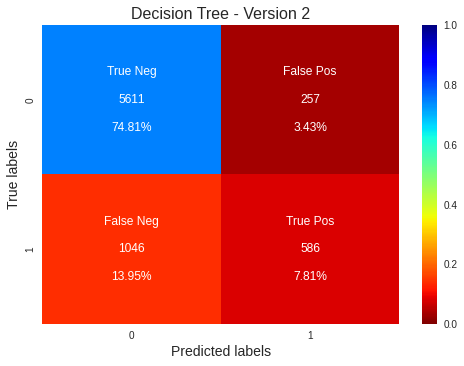

In [15]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_tree.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_tree.flatten()/np.sum(cf_tree)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_tree/np.sum(cf_tree), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Decision Tree - Version 2", fontsize = 16)

plt.show()

## Random Forest

In [16]:
parametros = {'n_estimators':[75, 100, 125, 150], 'criterion': ['gini', 'entropy'],
              'max_depth':[2, 4, 6, 8, 10, 15], 'min_samples_split':[2, 4, 6, 8, 10],
             'min_samples_leaf': [1, 3, 5, 7, 9]}

In [17]:
grid = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions= parametros)
grid_result = grid.fit(x_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)

0.8181333333333333
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'gini'}


In [18]:
parametros_rf = grid_result.best_params_

rf = RandomForestClassifier(**parametros_rf)
rf.fit(x_train, y_train)

v2_rf = rf.predict(x_test)

In [19]:
version2_accuracy.append(accuracy_score(y_test, v2_rf))
version2_recall.append(recall_score(y_test, v2_rf))

In [20]:
print(classification_report(y_test, v2_rf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5868
           1       0.67      0.35      0.46      1632

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [21]:
cf_rf = confusion_matrix(y_test, v2_rf)

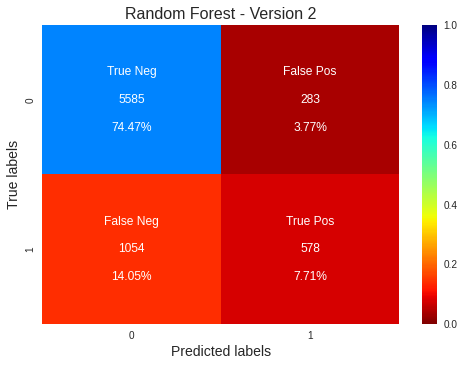

In [22]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_rf.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_rf.flatten()/np.sum(cf_rf)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_rf/np.sum(cf_rf), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Random Forest - Version 2", fontsize = 16)

plt.show()

## KNN

In [23]:
parametros = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 10, 12], 'weights':['uniform', 'distance'],
             'algorithm':['ball_tree', 'kd_tree', 'brute', 'auto']}

In [24]:
grid = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=parametros)
grid_result = grid.fit(x_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)

0.7691555555555556
{'weights': 'uniform', 'n_neighbors': 8, 'algorithm': 'brute'}


In [25]:
parametros_knn = grid_result.best_params_
knn = KNeighborsClassifier(**parametros_knn)
knn.fit(x_train, y_train)
v2_knn = knn.predict(x_test)

In [26]:
version2_accuracy.append(accuracy_score(y_test, v2_knn))
version2_recall.append(recall_score(y_test, v2_knn))

In [27]:
print(classification_report(y_test, v2_knn))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      5868
           1       0.42      0.09      0.15      1632

    accuracy                           0.78      7500
   macro avg       0.61      0.53      0.51      7500
weighted avg       0.71      0.78      0.71      7500



In [28]:
cf_knn = confusion_matrix(y_test, v2_knn)

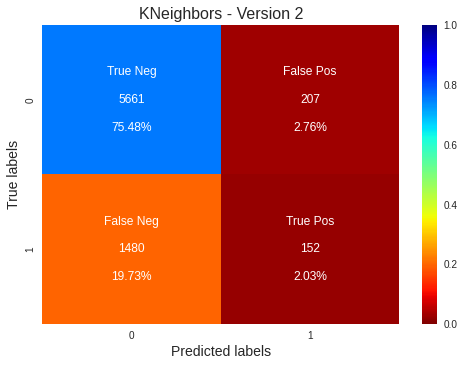

In [29]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_knn.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_knn.flatten()/np.sum(cf_knn)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_knn/np.sum(cf_knn), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("KNeighbors - Version 2", fontsize = 16)

plt.show()

# Cross Validation

In [32]:
resultados_tree_accuracy = []
resultados_random_accuracy = []
resultados_knn_accuracy = []

resultados_tree_recall = []
resultados_random_recall = []
resultados_knn_recall = []



for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    tree = DecisionTreeClassifier(**parametros_tree)
    
    scores = cross_val_score(tree, x_train, y_train, scoring='recall', cv = kfold)
    resultados_tree_recall.append(scores.mean())
    
    scores = cross_val_score(tree, x_train, y_train, scoring='accuracy', cv = kfold)
    resultados_tree_accuracy.append(scores.mean())
    
    print('Tree - Stage: {}'.format(i))
    
    # ==================================================================
        
    rf = RandomForestClassifier(**parametros_rf)
    
    scores = cross_val_score(rf, x_train, y_train,scoring = 'recall', cv=kfold)
    resultados_random_recall.append(scores.mean())
    
    scores = cross_val_score(rf, x_train, y_train,scoring = 'accuracy', cv=kfold)
    resultados_random_accuracy.append(scores.mean())
    
    print('Random Forest - Stage: {}'.format(i))
    #===================================================================
    
    knn = KNeighborsClassifier(**parametros_knn)
    
    scores = cross_val_score(knn, x_train, y_train, scoring='recall', cv=kfold)
    resultados_knn_recall.append(scores.mean())
    
    scores = cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=kfold)
    resultados_knn_accuracy.append(scores.mean())
    
    
    #===================================================================
    print('KNN - Stage: {}'.format(i))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 29


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 29


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 29


In [63]:
resultados_accuracy = pd.DataFrame({'Decision Tree': resultados_tree_accuracy, 
                           'Random Forest': resultados_random_accuracy,
                          'KNN': resultados_knn_accuracy})

resultados_recall = pd.DataFrame({'Decision Tree': resultados_tree_recall, 
                           'Random Forest': resultados_random_recall,
                          'KNN': resultados_knn_recall})

In [64]:
resultados_accuracy.to_csv("resultados_accuracy_version2.csv")
resultados_recall.to_csv("resultados_recall_version2.csv")

In [92]:
resultados_accuracy.head(7)

,Decision Tree,Random Forest,KNN
0,0.819156,0.817911,0.770622
1,0.818756,0.818400,0.770178
2,0.819156,0.817556,0.771067
3,0.819156,0.816756,0.771111
4,0.818356,0.818089,0.772222
5,0.818578,0.817422,0.769289
6,0.818489,0.817467,0.770356


# Storaging and saving the results

In [83]:
accuracy_list = []
recall_list = []

for i in range(len(resultados_accuracy.columns)):
    accuracy_list.append( resultados_accuracy[ resultados_accuracy.columns[i] ].mean() )
    recall_list.append( resultados_recall[ resultados_recall.columns[i] ].mean() )

In [84]:
resultados_accuracy.mean()

Decision Tree    0.818782
Random Forest    0.817401
KNN              0.770861
dtype: float64

In [85]:
accuracy_list

[0.8187822222222221, 0.8174014814814813, 0.7708607407407408]

In [86]:
accuracy = pd.read_csv('accuracy_versions.csv')
recall = pd.read_csv("recall_versions.csv")

accuracy

,Algorithms,Version 1
0,Decision Tree,0.733600
1,Random Forest,0.819067
2,KNN,0.762133


In [87]:
recall

,Algorithms,Version 1
0,Decision Tree,0.409314
1,Random Forest,0.368260
2,KNN,0.194240


In [88]:
recall['Version 2'] = recall_list
accuracy['Version 2'] = accuracy_list

In [89]:
accuracy

,Algorithms,Version 1,Version 2
0,Decision Tree,0.733600,0.818782
1,Random Forest,0.819067,0.817401
2,KNN,0.762133,0.770861


In [90]:
recall

,Algorithms,Version 1,Version 2
0,Decision Tree,0.409314,0.358220
1,Random Forest,0.368260,0.359337
2,KNN,0.194240,0.097050


In [91]:
accuracy.to_csv("accuracy_versions.csv", index=None)

recall.to_csv("recall_versions.csv", index = None)